<a href="https://colab.research.google.com/github/Durgarao-git/Python-Machine_Learning-Projects/blob/main/Project_4_Car_Price_Prediction_(ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import metrics

#Import Dataset

In [ ]:
dataset=pd.read_csv('/content/car data.csv')

In [ ]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
dataset.shape

(301, 9)

In [ ]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


#Encoding Categorial data

In [ ]:
#fuel type
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
#Seller type
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
#Transmission
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#Separating Features and Target

In [ ]:
x=dataset.drop(columns=['Selling_Price','Car_Name'],axis=1)
y=dataset['Selling_Price']

In [ ]:
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

#Train,Test and Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

#Model Training

#Linear Regression

In [ ]:
linear_model=LinearRegression()

In [ ]:
linear_model.fit(x_train,y_train)

LinearRegression()

#Model Evaluation

In [ ]:
#Predicting The Training Data

linear_Pre=linear_model.predict(x_train)

#Calculating R*2 Score


In [ ]:
linear_metrics=metrics.r2_score(linear_Pre,y_train)
print('the r2 score of Linear Regression : ',linear_metrics)

the r2 score of Linear Regression :  0.8635655509198777


#Calculating Mean Abs Error

In [ ]:
linear_metrics1=metrics.mean_absolute_error(linear_Pre,y_train)
print('the mean abs error of Linear Regression : ',linear_metrics1)

the mean abs error of Linear Regression :  1.2166174093911273


#Visualize Predicted Price and Actual prices

Text(0.5, 1.0, 'Predicted Price vs Actual price')

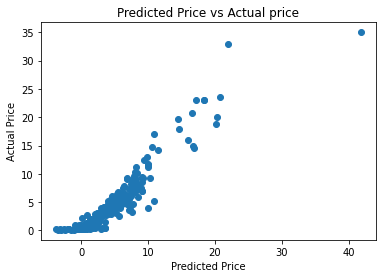

In [ ]:
plt.scatter(linear_Pre,y_train)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Predicted Price vs Actual price')